# Facebook Live Sellers in Thailand 

## Objective
Facebook pages of 10 Thai fashion and cosmetics retail sellers. Posts of a different nature (video, photos, statuses, and links). Engagement metrics consist of comments, shares, and reactions.

Objective of the study is to identify cluster patterns from dataset to help Fashion and cosmetics retail to engage with consumers on Facebook, in the most efficient ways.

## Approach
* Collect data from UCI Machine Learning Repostiory
* Clean the dataset [missing values, variables convert like Date & Time etc]
* Run Exploratery Data Analysis (EDA) and complet data analysis based on pivottable.
* Build model based on K-means clustering and Hierarchical Clustering
* Apply silhouette index for cluster performance measurement.


## Data Analysis - PowerBI
* We have observed that Customer interaction is increasing year on year from 2012 to 2018 with around 27.66% compounding. However, we data also observed steep fall in 2014.
* Based on the dataset interaction based on ‘photo’ status is the highest, compare to link, statues and videos.
* Based on the months we observed that May and December have maximum interaction with customers.
* Based on the day statistics we observed that June gets high customer interaction starting in the month and month May which has one of the highest interactions get constant customers interactions in end of the month, which indicated best days in a middle of the year is after 20th May and before 13th June. However, Days in December month are consistent on customer interaction.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Data=pd.read_csv('Live_20210128.csv')

In [3]:
df=Data

In [4]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [5]:
df.tail()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
7045,7046,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,7047,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,7048,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,7049,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN
7049,7050,photo,9/10/2016 10:30,17,0,0,17,0,0,0,0,0,NaN,NaN,NaN,NaN


In [6]:
print('SIZE :-',df.size)
print('SHAPE :-',df.shape)

SIZE :- 112800
SHAPE :- (7050, 16)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

# convert date into date time datatype

In [8]:
df.status_published=pd.to_datetime(df.status_published)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   status_id         7050 non-null   int64         
 1   status_type       7050 non-null   object        
 2   status_published  7050 non-null   datetime64[ns]
 3   num_reactions     7050 non-null   int64         
 4   num_comments      7050 non-null   int64         
 5   num_shares        7050 non-null   int64         
 6   num_likes         7050 non-null   int64         
 7   num_loves         7050 non-null   int64         
 8   num_wows          7050 non-null   int64         
 9   num_hahas         7050 non-null   int64         
 10  num_sads          7050 non-null   int64         
 11  num_angrys        7050 non-null   int64         
 12  Column1           0 non-null      float64       
 13  Column2           0 non-null      float64       
 14  Column3           0 non-

In [10]:
df["day"] = df['status_published'].map(lambda x: x.day)
df["month"] = df['status_published'].map(lambda x: x.month)
df["year"] = df['status_published'].map(lambda x: x.year)

In [11]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4,day,month,year
0,1,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN,22,4,2018
1,2,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN,21,4,2018
2,3,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN,21,4,2018
3,4,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN,21,4,2018
4,5,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN,18,4,2018


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   status_id         7050 non-null   int64         
 1   status_type       7050 non-null   object        
 2   status_published  7050 non-null   datetime64[ns]
 3   num_reactions     7050 non-null   int64         
 4   num_comments      7050 non-null   int64         
 5   num_shares        7050 non-null   int64         
 6   num_likes         7050 non-null   int64         
 7   num_loves         7050 non-null   int64         
 8   num_wows          7050 non-null   int64         
 9   num_hahas         7050 non-null   int64         
 10  num_sads          7050 non-null   int64         
 11  num_angrys        7050 non-null   int64         
 12  Column1           0 non-null      float64       
 13  Column2           0 non-null      float64       
 14  Column3           0 non-

### Drop unnecessary features

The features with missing values, redundant features, and features with insignificant correlation are dropped.

In [13]:
df.drop(['Column1', 'Column2', 'Column3', 'Column4', 'status_id', 'status_published'], axis=1, inplace=True)

In [14]:
# info after dropping unnessary column

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
 10  day            7050 non-null   int64 
 11  month          7050 non-null   int64 
 12  year           7050 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 716.1+ KB


In [16]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,day,month,year
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,15.792624,6.577730,2016.382128
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,8.728489,3.587108,1.943176
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2012.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,3.000000,2016.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,6.000000,2017.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,23.000000,10.000000,2018.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,31.000000,12.000000,2018.000000


### Visualize Feature Distributions
#### Univariate analysis

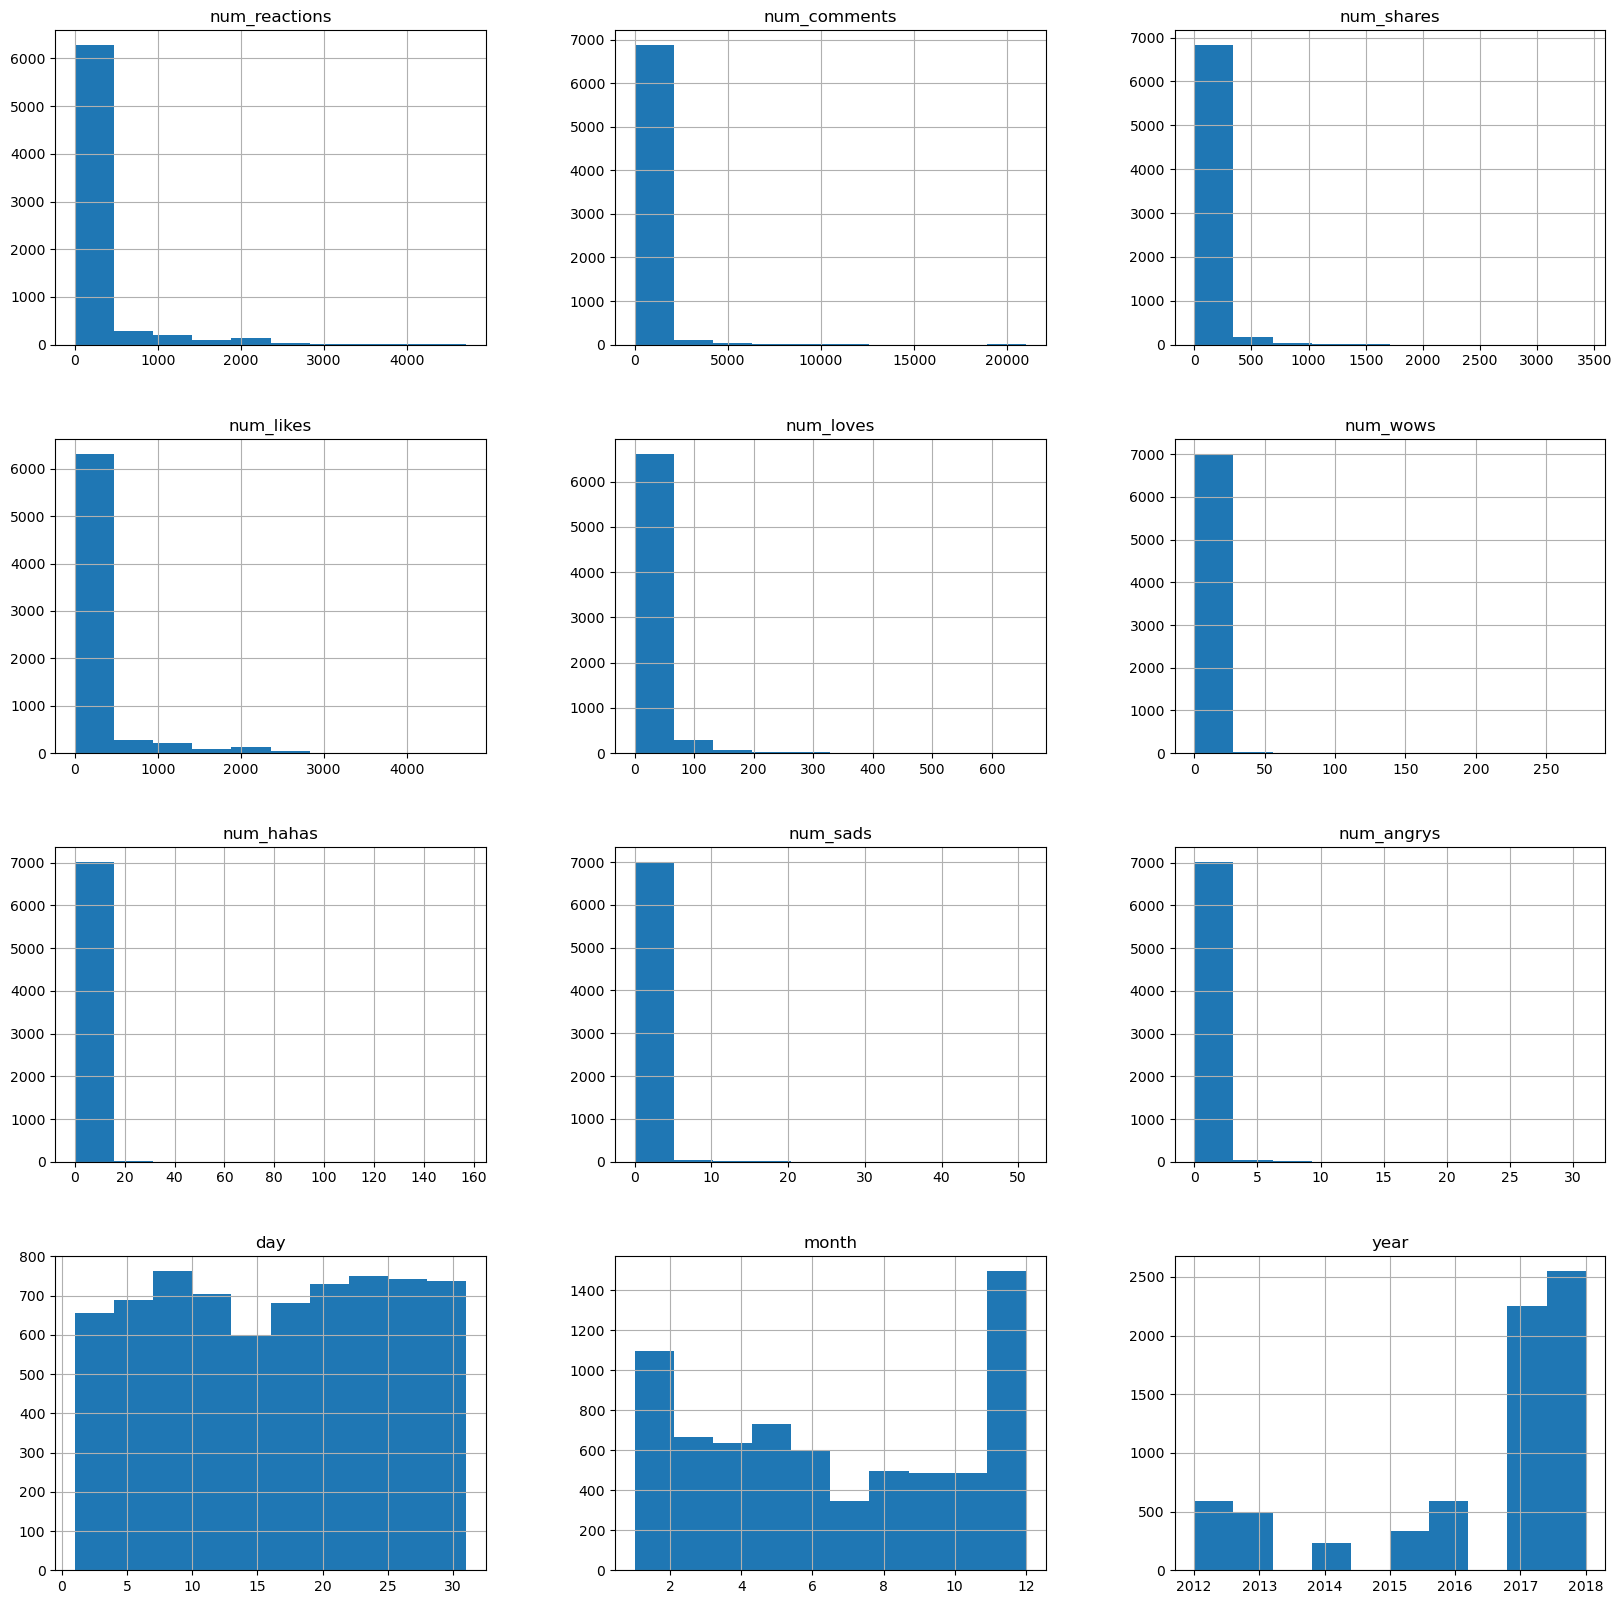

In [17]:
# hist plot
df.hist(figsize=(20,20));

C:\Users\Yashwant\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


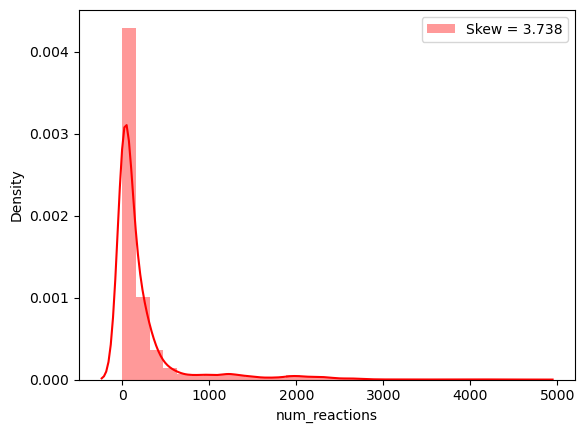

C:\Users\Yashwant\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


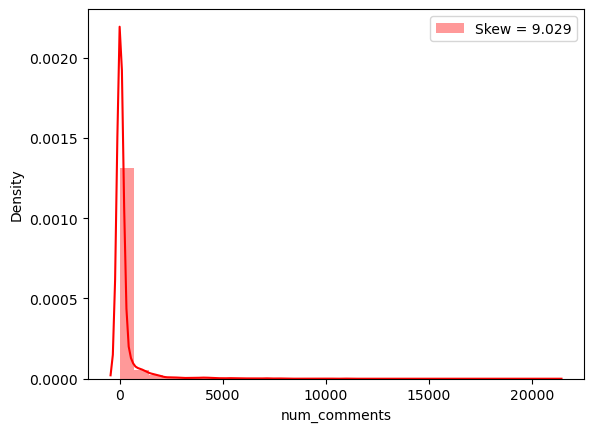

C:\Users\Yashwant\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


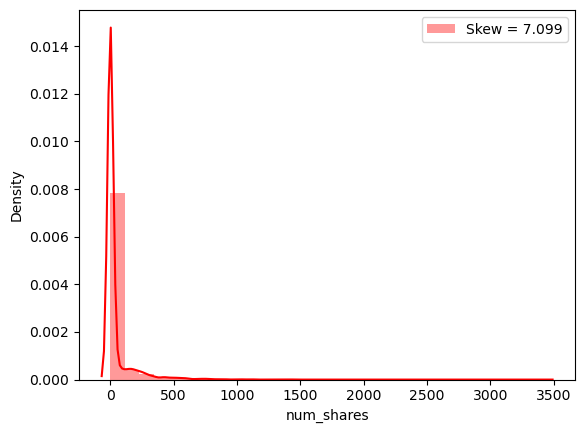

C:\Users\Yashwant\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


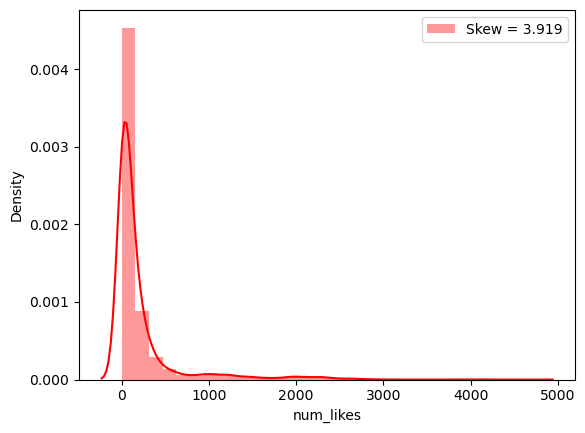

C:\Users\Yashwant\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


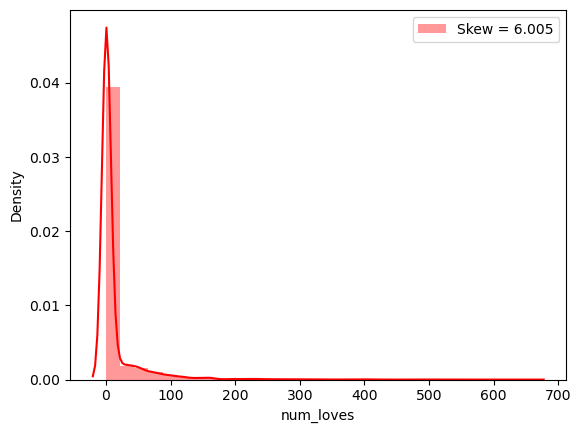

C:\Users\Yashwant\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


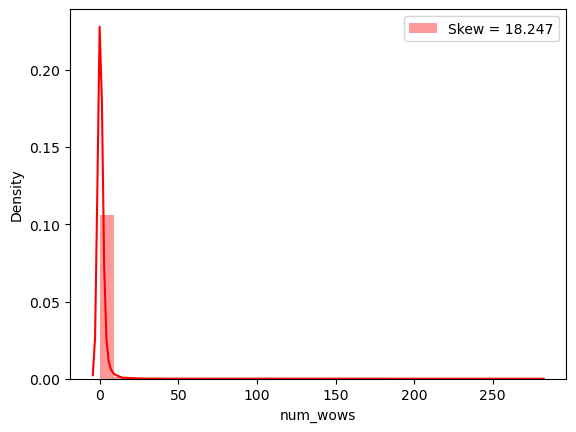

C:\Users\Yashwant\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


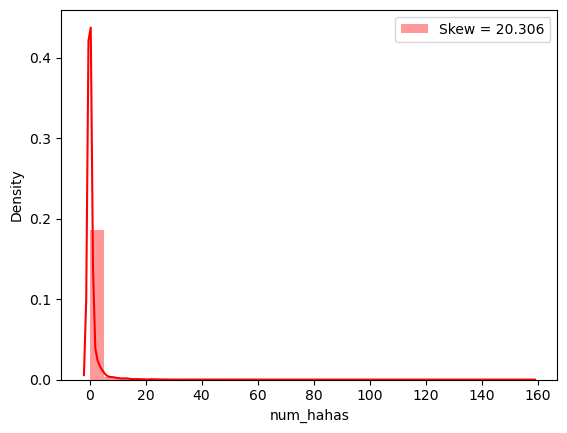

C:\Users\Yashwant\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


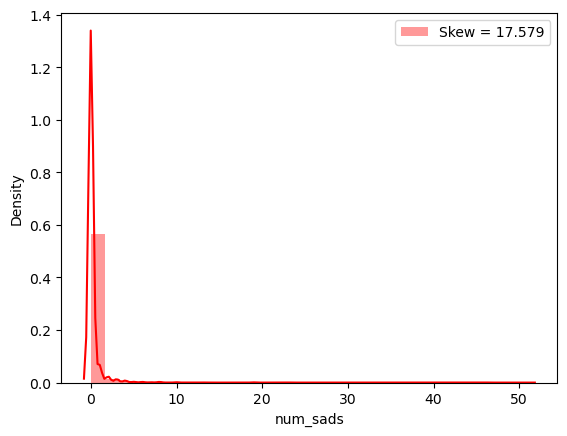

C:\Users\Yashwant\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


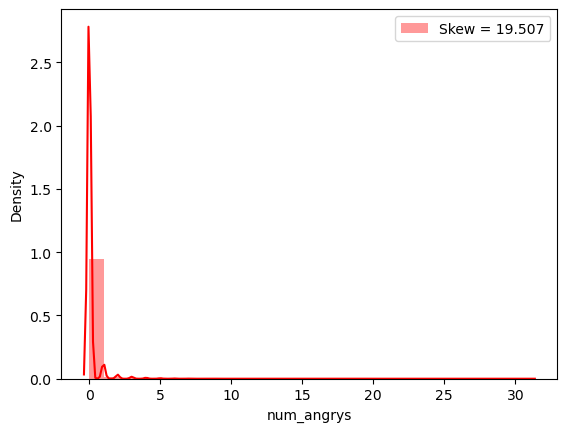

C:\Users\Yashwant\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


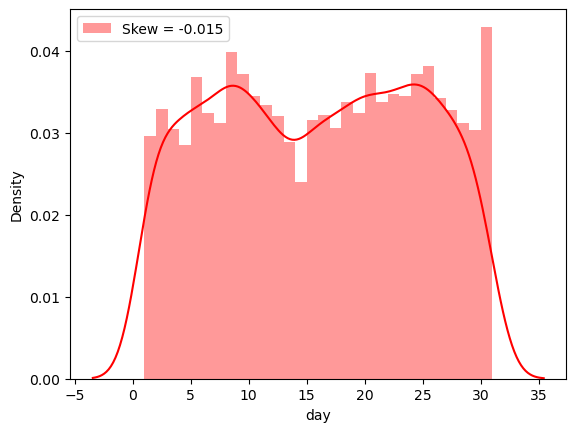

C:\Users\Yashwant\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


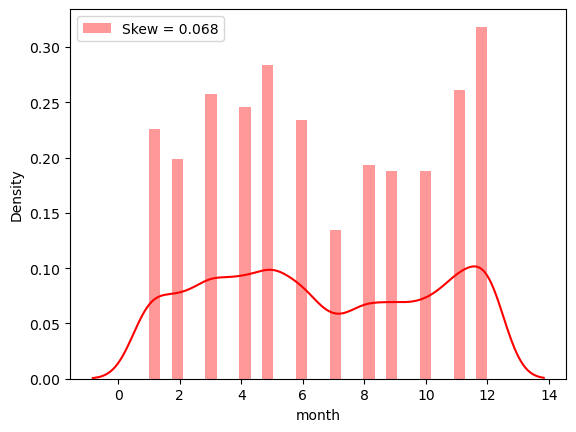

C:\Users\Yashwant\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


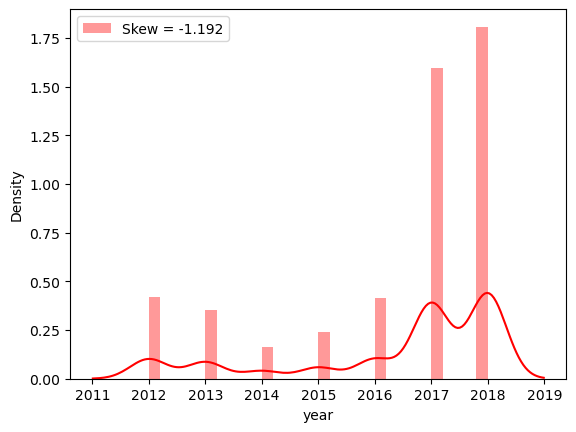

In [18]:
a=[cols for cols in df.columns if df[cols].dtypes != 'O']
for i in a:
    skew = df[i].skew()
    sns.distplot(df[i], kde= True, label='Skew = %.3f' %(skew), bins=30,color='r')
    plt.legend(loc='best')
    plt.show();

### Bivariate analysis
#### heatmap for understanding correlation

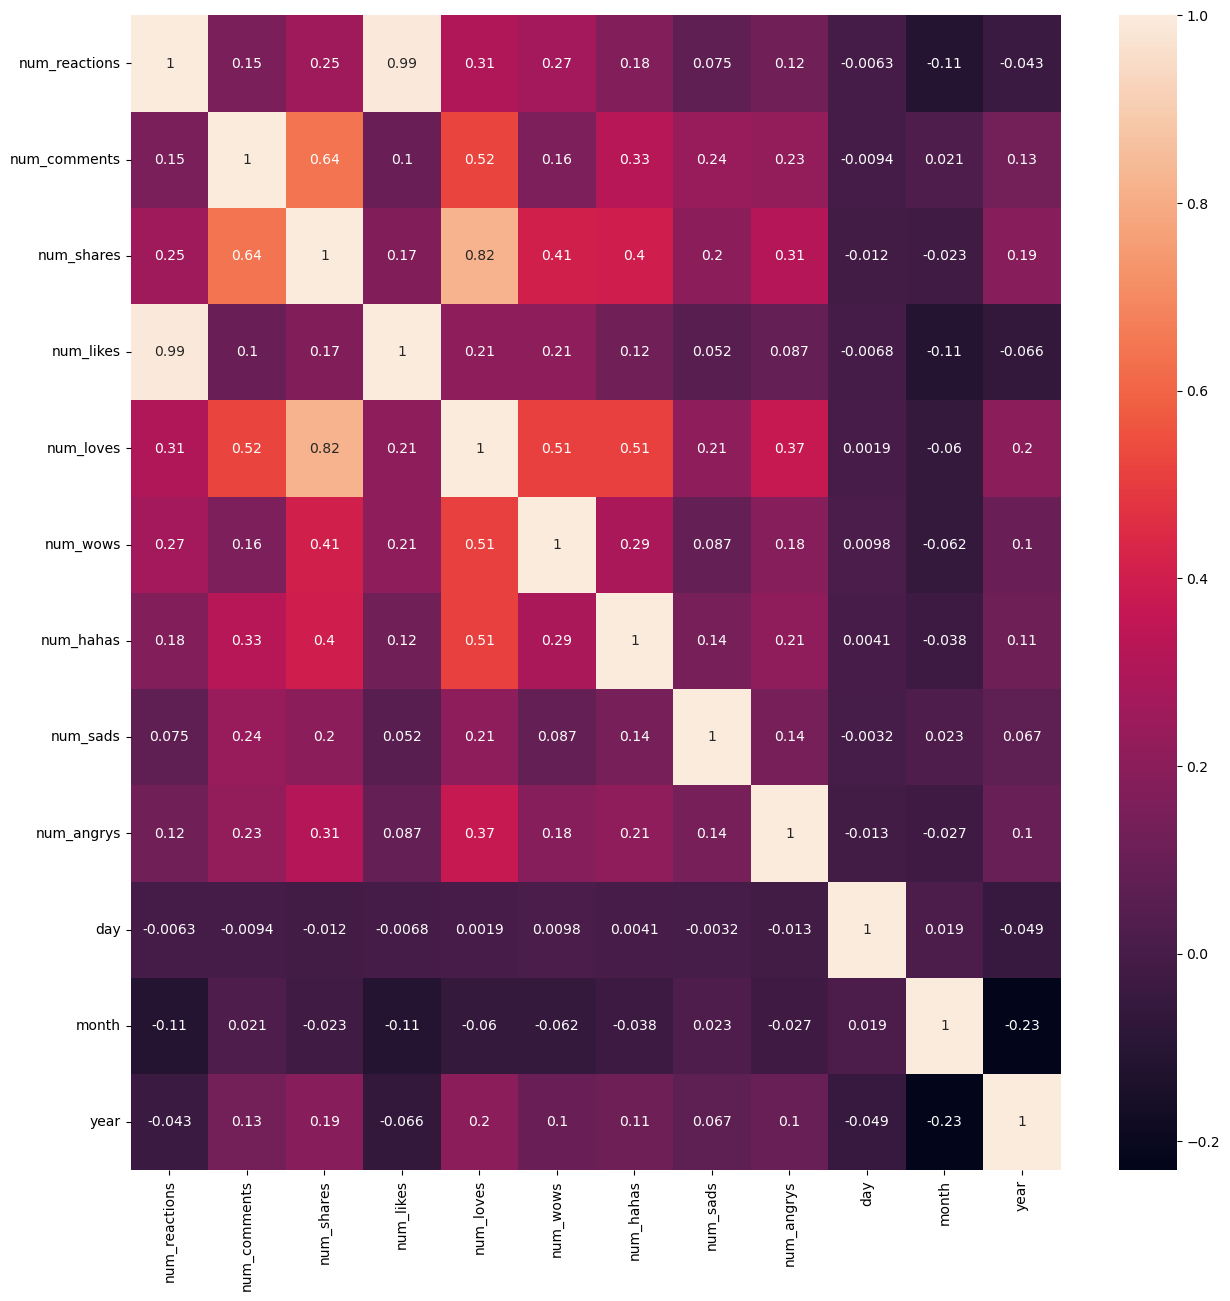

In [19]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True);

To get a better understanding of the dataset, we can construct a pairplot

<Figure size 2000x2000 with 0 Axes>

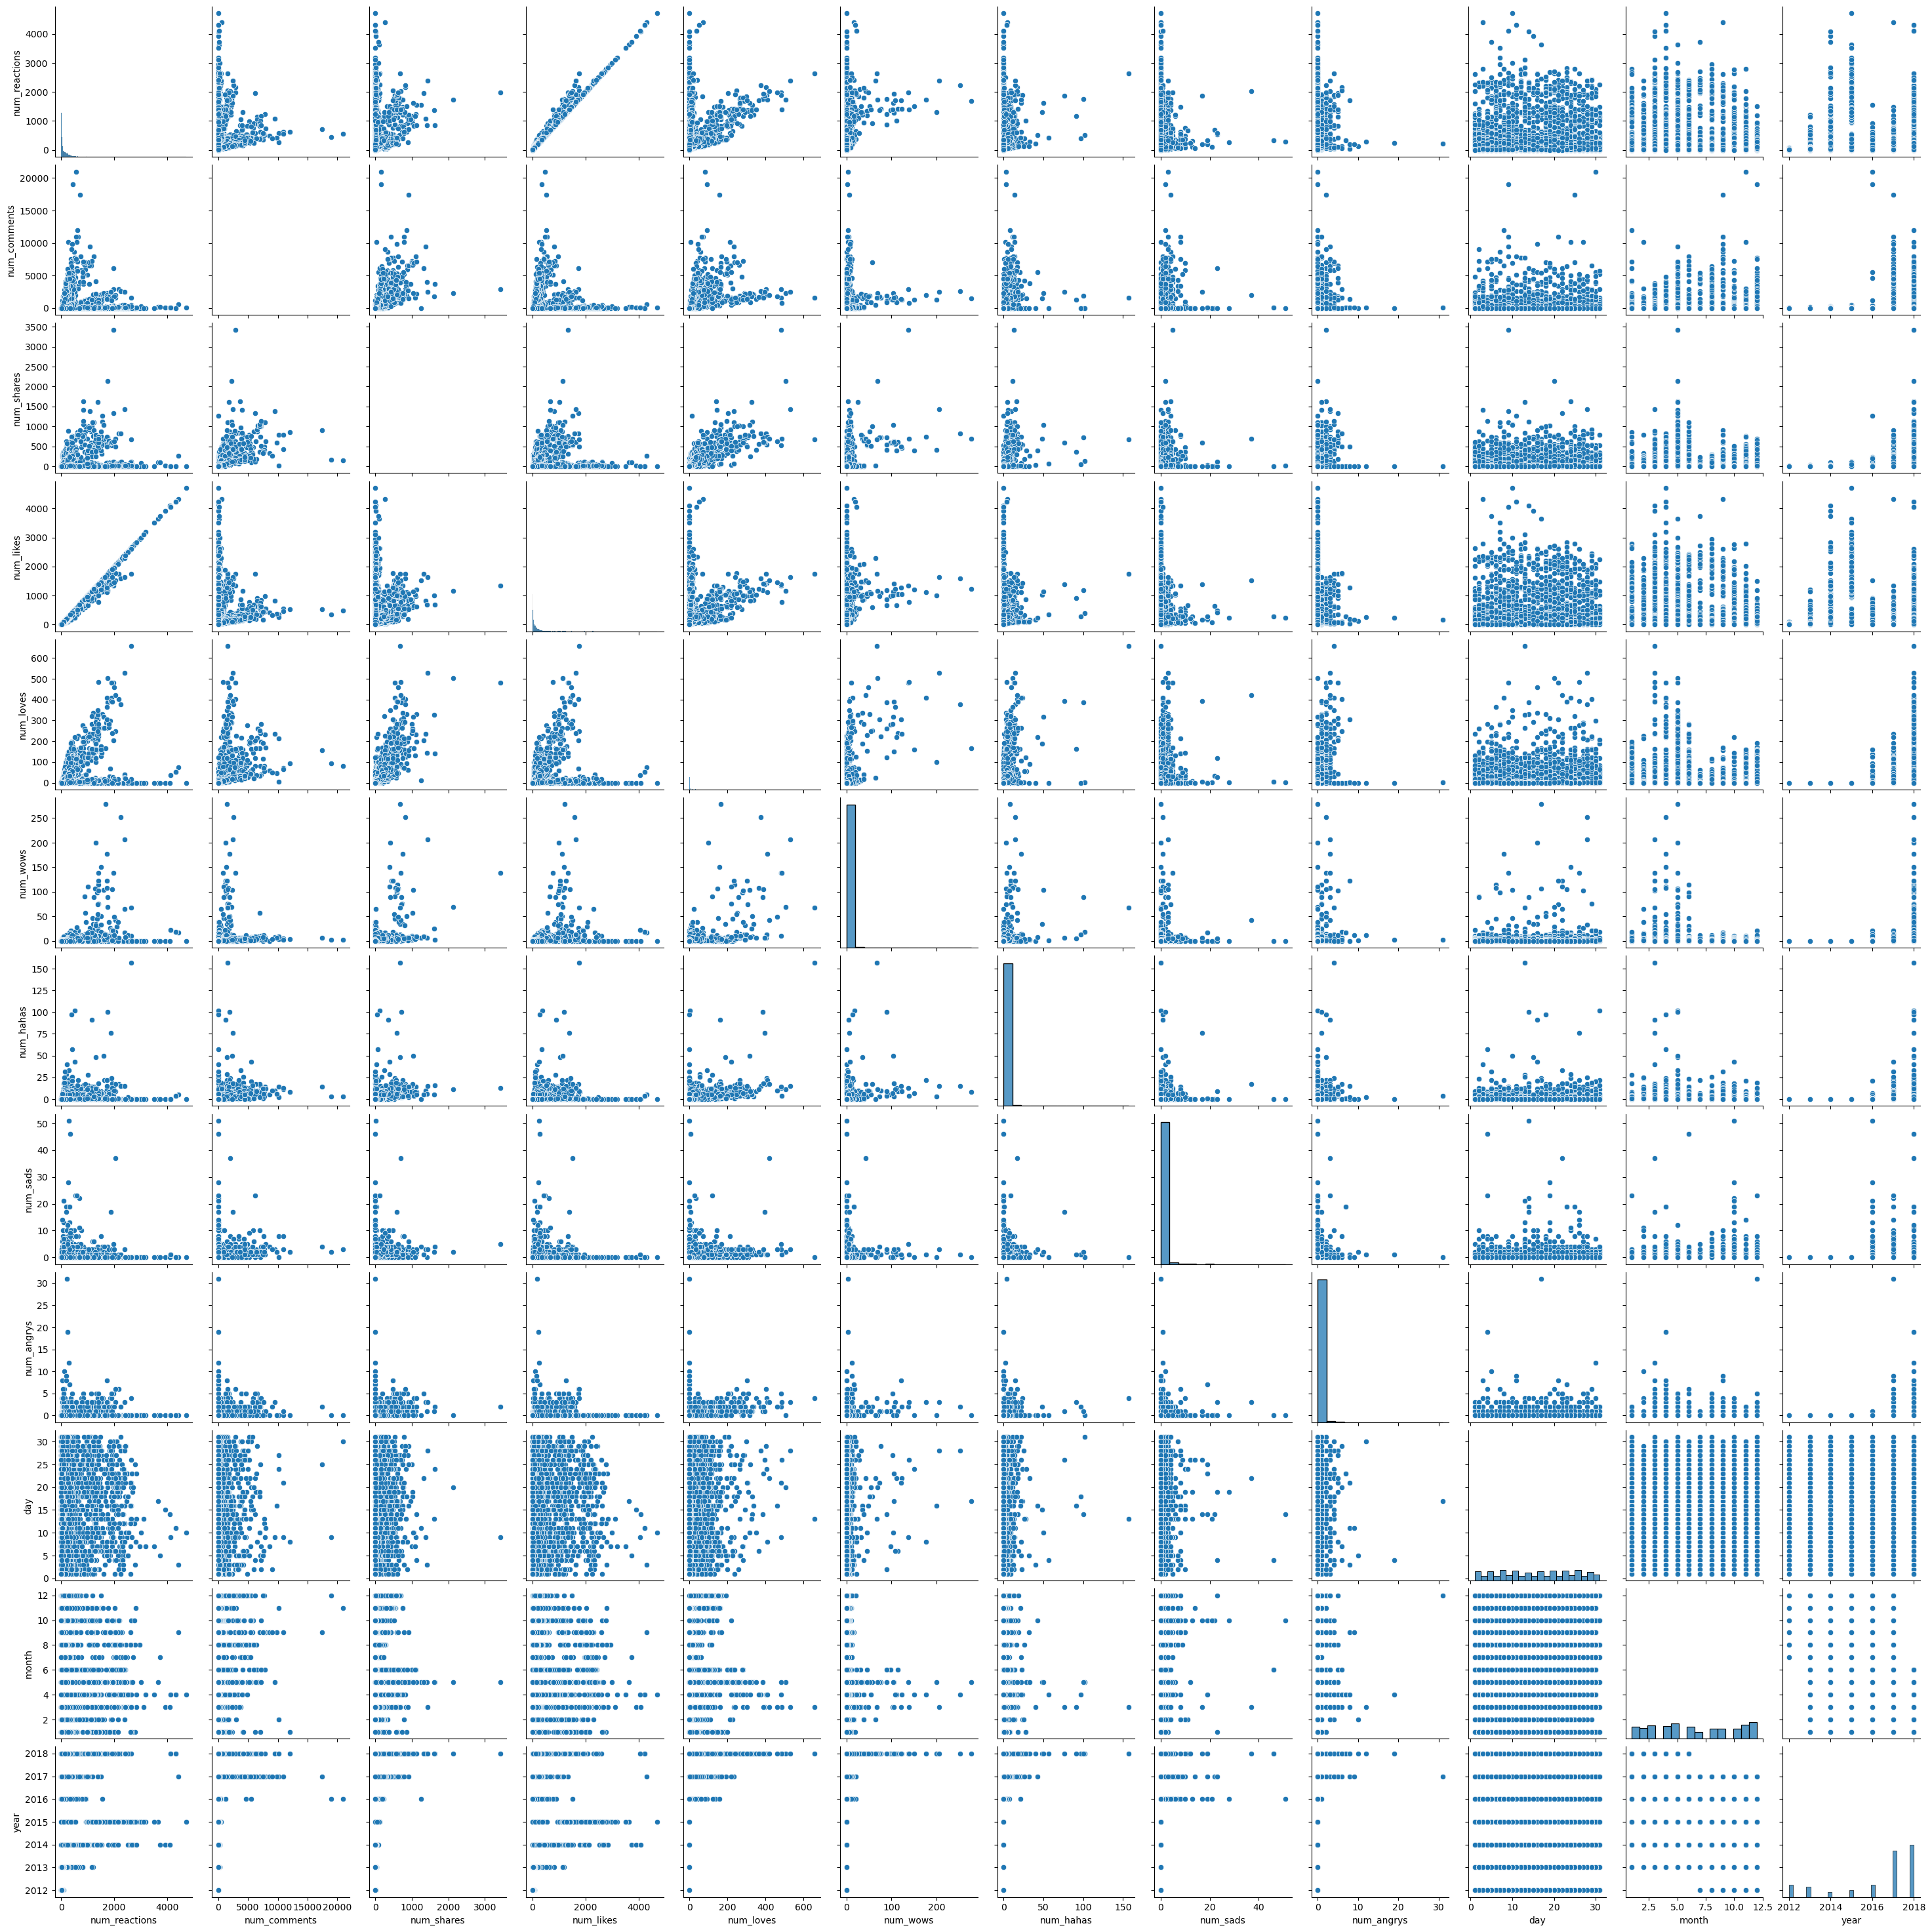

In [20]:
#pairplot
plt.figure(figsize=(20,20))
sns.pairplot(df);

#### Convert  Catagerical data into numerical

In [21]:
df=pd.get_dummies(df,drop_first='True')

In [22]:
df.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,day,month,year,status_type_photo,status_type_status,status_type_video
0,529,512,262,432,92,3,1,1,0,22,4,2018,0,0,1
1,150,0,0,150,0,0,0,0,0,21,4,2018,1,0,0
2,227,236,57,204,21,1,1,0,0,21,4,2018,0,0,1
3,111,0,0,111,0,0,0,0,0,21,4,2018,1,0,0
4,213,0,0,204,9,0,0,0,0,18,4,2018,1,0,0


#### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most often appropriate to apply a non-linear scaling — particularly for financial data.

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scale = MinMaxScaler()
X = scale.fit_transform(df)

### K-Means

Finding the optimum value of k for k-means clustering using the elbow method. Plot the elbow curve

In [25]:
from sklearn.cluster import KMeans

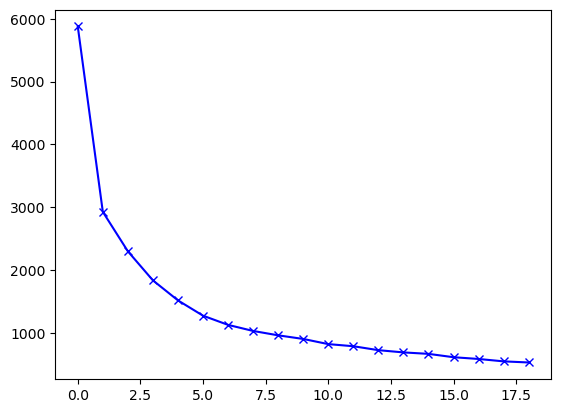

In [26]:
#optimal no. of clusters
n_clusters=20
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(X)
    cost.append(kmean.inertia_)  
   
plt.plot(cost, 'bx-');

silhouette method

In [27]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [29]:
scores = {}
for i in range(2,16):
    
    print('Number of clusters: ' + str(i))
        
    # Apply your clustering algorithm of choice to thedata 
    clusterer = GaussianMixture(random_state=0,n_components=i)
    clusterer.fit(X)

    # Predict the cluster for each data point
    preds = clusterer.predict(X)

    # Find the cluster centers
    centers = clusterer.means_
    print('Cluster Center: ' + str(centers))

    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(X, preds)
    scores[i] = score
    print('Silhouette score is: ' + str(score), '\n')
    
print('Scores: ' + str(scores))

Number of clusters: 2
Cluster Center: [[3.84905191e-02 7.61956653e-04 7.45873618e-04 3.79572084e-02
  2.19968934e-03 2.46295501e-03 1.21506322e-03 2.79393474e-03
  1.47448243e-03 5.02293221e-01 5.08989145e-01 6.76033893e-01
  1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.49513184e-02 2.60999773e-02 2.86777494e-02 5.76101812e-02
  4.60368317e-02 8.01473231e-03 9.43652942e-03 7.85875538e-03
  7.03090327e-03 4.78795559e-01 5.04081364e-01 8.14687425e-01
  0.00000000e+00 1.32150615e-01 8.45039826e-01]]
Silhouette score is: 0.4878978202922128 

Number of clusters: 3
Cluster Center: [[1.04353932e-001 3.29078970e-003 3.21875868e-003 1.02543501e-001
  5.80845819e-003 8.99721974e-003 6.23765181e-003 1.89580371e-002
  8.50232834e-003 4.92498712e-001 4.99632666e-001 8.20853582e-001
  4.49712720e-001 4.69287050e-001 0.00000000e+000]
 [6.01718890e-002 3.06087732e-002 3.37850317e-002 5.15956315e-002
  5.40947857e-002 8.80632255e-003 1.10523472e-002 8.11532839e-003
  8.19581502e-003 4.75821194e-00

The number of clusters with the best silhouette score is 2, with a 0.4678 score.

Once we choose the optimal number of clusters for your clustering algorithm using the scoring metric above, we can now visualize the results below

In [30]:
# Apply your clustering algorithm of choice to thedata 
clusterer = GaussianMixture(random_state=0, n_components=2)
clusterer.fit(X)

# Predict the cluster for each data point
preds = clusterer.predict(X)

# Find the cluster centers
centers = clusterer.means_
print('Cluster Center: ' + str(centers))

# Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(X, preds)
scores[i] = score
print('Silhouette score is: ' + str(score), '\n')

Cluster Center: [[3.84905191e-02 7.61956653e-04 7.45873618e-04 3.79572084e-02
  2.19968934e-03 2.46295501e-03 1.21506322e-03 2.79393474e-03
  1.47448243e-03 5.02293221e-01 5.08989145e-01 6.76033893e-01
  1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.49513184e-02 2.60999773e-02 2.86777494e-02 5.76101812e-02
  4.60368317e-02 8.01473231e-03 9.43652942e-03 7.85875538e-03
  7.03090327e-03 4.78795559e-01 5.04081364e-01 8.14687425e-01
  0.00000000e+00 1.32150615e-01 8.45039826e-01]]
Silhouette score is: 0.4878978202922128 



## centers where cluster is form

In [31]:
centers

array([[3.84905191e-02, 7.61956653e-04, 7.45873618e-04, 3.79572084e-02,
        2.19968934e-03, 2.46295501e-03, 1.21506322e-03, 2.79393474e-03,
        1.47448243e-03, 5.02293221e-01, 5.08989145e-01, 6.76033893e-01,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.49513184e-02, 2.60999773e-02, 2.86777494e-02, 5.76101812e-02,
        4.60368317e-02, 8.01473231e-03, 9.43652942e-03, 7.85875538e-03,
        7.03090327e-03, 4.78795559e-01, 5.04081364e-01, 8.14687425e-01,
        0.00000000e+00, 1.32150615e-01, 8.45039826e-01]])

In [32]:
# Initialize the KMeans object
kmeans = KMeans(n_clusters=2,random_state=0)

# Fit the model to the data
kmeans.fit(X)

# Predict the cluster labels for each data point
labels = kmeans.predict(X)

# Get the cluster centers
centers = kmeans.cluster_centers_


In [33]:
cen = scale.inverse_transform(centers)
cen

array([[ 1.81290345e+02,  1.59934701e+01,  2.55387127e+00,
         1.78778451e+02,  1.44519590e+00,  6.84701493e-01,
         1.90764925e-01,  1.42490672e-01,  4.57089552e-02,
         1.60687966e+01,  6.59888060e+00,  2.01605620e+03,
         1.00000000e+00, -4.44089210e-16, -3.77475828e-15],
       [ 3.05920710e+02,  5.47838523e+02,  9.81926140e+01,
         2.71343954e+02,  3.02461984e+01,  2.22809558e+00,
         1.48153512e+00,  4.00796524e-01,  2.17958001e-01,
         1.53638668e+01,  6.54489500e+00,  2.01688812e+03,
         2.55351296e-15,  1.32150615e-01,  8.45039826e-01]])

In [34]:
df.columns

Index(['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
       'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'day', 'month',
       'year', 'status_type_photo', 'status_type_status', 'status_type_video'],
      dtype='object')

In [35]:
centers = pd.DataFrame(cen, columns=['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
       'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'day', 'month',
       'year', 'status_type_photo', 'status_type_status', 'status_type_video'])
centers

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,day,month,year,status_type_photo,status_type_status,status_type_video
0,181.290345,15.993470,2.553871,178.778451,1.445196,0.684701,0.190765,0.142491,0.045709,16.068797,6.598881,2016.056203,1.000000e+00,-4.440892e-16,-3.774758e-15
1,305.920710,547.838523,98.192614,271.343954,30.246198,2.228096,1.481535,0.400797,0.217958,15.363867,6.544895,2016.888125,2.553513e-15,1.321506e-01,8.450398e-01


## Counting no of datapoint in each cluster

In [36]:
df['status_type_video'] = kmeans.labels_
df.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,day,month,year,status_type_photo,status_type_status,status_type_video
0,529,512,262,432,92,3,1,1,0,22,4,2018,0,0,1
1,150,0,0,150,0,0,0,0,0,21,4,2018,1,0,0
2,227,236,57,204,21,1,1,0,0,21,4,2018,0,0,1
3,111,0,0,111,0,0,0,0,0,21,4,2018,1,0,0
4,213,0,0,204,9,0,0,0,0,18,4,2018,1,0,0


In [37]:
df['status_type_video'].value_counts()

0    4288
1    2762
Name: status_type_video, dtype: int64

In [38]:
df['num_reactions'] = kmeans.labels_

In [39]:
df['num_reactions'].value_counts()

0    4288
1    2762
Name: num_reactions, dtype: int64

In [40]:
## Visualize the results

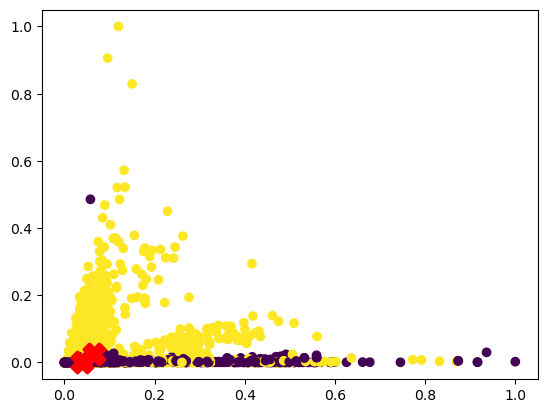

In [41]:
# Initialize the KMeans object
kmeans = KMeans(n_clusters=2,random_state=0)

# Fit the model to the data
kmeans.fit(X)

# Predict the cluster labels for each data point
labels = kmeans.predict(X)

# Get the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200, linewidths=3, color='r')
plt.show()

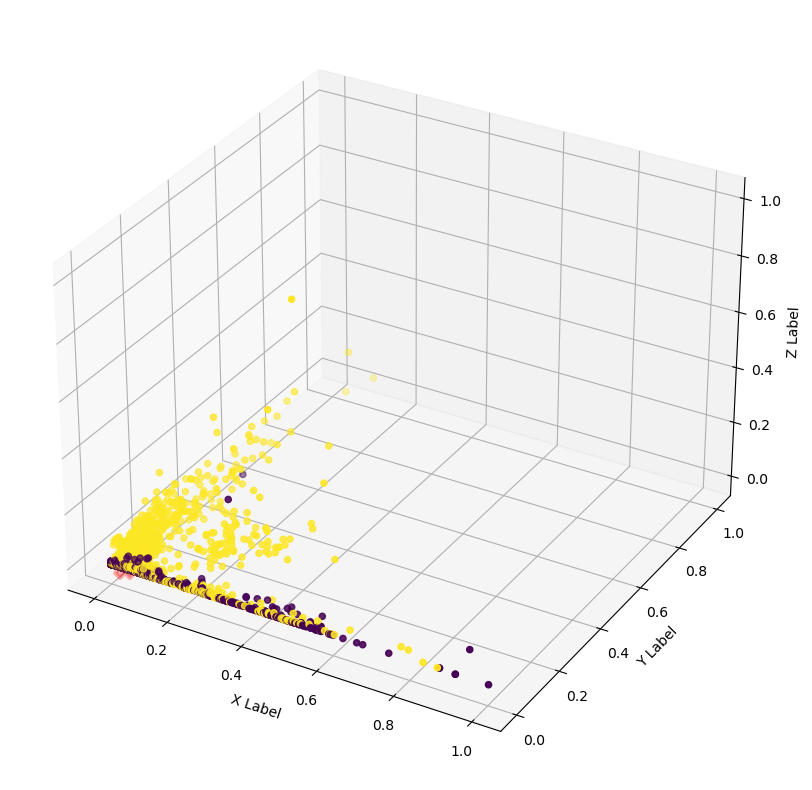

In [42]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Plot each point with its corresponding label color
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='viridis')
ax.scatter(centers[:, 0], centers[:, 1],centers[:, 2], marker='X', s=200, linewidths=3, color='r')


# Set the labels for the axes
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Show the plot
plt.show()

Based on the study, Facebook Engagement on Fashion by users in Thailand, we have observed that, cluster 1 size is 4,288 cluster 2 size is 2334 and cluster 3 size is 428.

* For all cluster June month is important for marketers to engage with consumers on FB.
* Cluster 1, being significant big in size is significantly low in engagement than cluster 2
* Number of comments and number of shares from cluster 2 is higher than cluster 1 & 3, which is significantly higher to create a buzz. This indicates cluster 2 has a significant active user. And in cluster 2 most of the users are window shoppers!

* But, from marketers’ point of view target should be how to generate more engage cluster 1,3 consumers.

# Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail.

In [43]:
# Select three indices of your choice you wish to sample from the dataset
indices = [80,160,338,1000,5555,6870]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(df.loc[indices], columns = df.keys()).reset_index(drop = True)
print("Chosen samples from dataset:")
samples

Chosen samples from dataset:


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,day,month,year,status_type_photo,status_type_status,status_type_video
0,1,76,21,114,13,0,0,0,0,16,1,2018,0,0,1
1,0,4,3,144,4,0,0,0,0,7,9,2017,1,0,0
2,0,0,0,230,0,1,0,0,0,20,3,2017,1,0,0
3,0,5,1,136,0,0,0,0,0,9,12,2015,1,0,0
4,1,1820,298,180,85,1,2,0,0,15,1,2018,0,0,1
5,0,92,11,183,4,1,0,0,0,21,8,2017,1,0,0


In [44]:
scale = MinMaxScaler()
x_samples = scale.fit_transform(samples)

In [46]:
# Apply your clustering algorithm of choice to the reduced data 
clusterer = GaussianMixture(random_state=0, n_components=2)
clusterer.fit(X)

GaussianMixture(n_components=2, random_state=0)

In [47]:
# Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(x_samples)
print('Sample predictions: ' + str(sample_preds))

Sample predictions: [1 0 0 0 1 0]


In [48]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0
Sample point 3 predicted to be in Cluster 0
Sample point 4 predicted to be in Cluster 1
Sample point 5 predicted to be in Cluster 0


# Hierarchical Clustering

Finding the optimal no of cluster using Dendogram

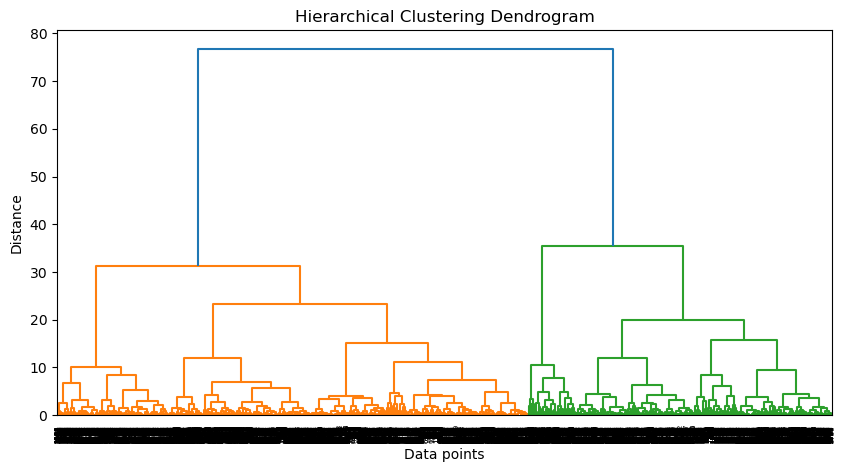

In [49]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


# Perform hierarchical clustering using complete linkage
Z = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
dendrogram(Z)
plt.show()

In [50]:
# Find the number of clusters using the dendrogram
max_d = 40 # Set the maximum distance to use for finding clusters
clusters = fcluster(Z, max_d, criterion='distance')
num_clusters = len(set(clusters))

print('Number of clusters:', num_clusters)

Number of clusters: 2


The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance deside no of cluster and hence we can decide a threshold of 40 from these we get 2 cluster

### Training the Clustering clustering model

In [51]:
from sklearn.cluster import AgglomerativeClustering

In [52]:
# Fit the hierarchical clustering model
model = AgglomerativeClustering(n_clusters=2)
model.fit(X)

AgglomerativeClustering()

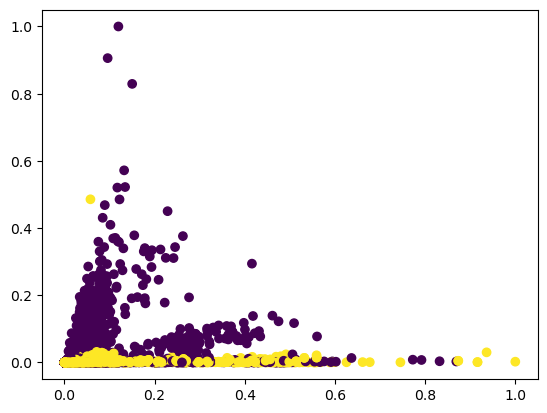

In [53]:
# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=model.labels_, cmap='viridis')
plt.show()

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail.

In [54]:
print("Chosen samples from dataset:")
samples

Chosen samples from dataset:


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,day,month,year,status_type_photo,status_type_status,status_type_video
0,1,76,21,114,13,0,0,0,0,16,1,2018,0,0,1
1,0,4,3,144,4,0,0,0,0,7,9,2017,1,0,0
2,0,0,0,230,0,1,0,0,0,20,3,2017,1,0,0
3,0,5,1,136,0,0,0,0,0,9,12,2015,1,0,0
4,1,1820,298,180,85,1,2,0,0,15,1,2018,0,0,1
5,0,92,11,183,4,1,0,0,0,21,8,2017,1,0,0


In [55]:
scale = MinMaxScaler()
x_samples = scale.fit_transform(samples)

In [56]:
model = AgglomerativeClustering(n_clusters=2)
model.fit(X)

AgglomerativeClustering()

In [57]:
# Predict the cluster for each transformed sample data point
sample_pred =model.fit_predict(x_samples)
print('Sample predictions: ' + str(sample_pred))

Sample predictions: [1 0 0 0 1 0]


In [58]:
# Display the predictions
for i, pred in enumerate(sample_pred):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0
Sample point 3 predicted to be in Cluster 0
Sample point 4 predicted to be in Cluster 1
Sample point 5 predicted to be in Cluster 0


# Thank You

In [62]:
df.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,day,month,year,status_type_photo,status_type_status,status_type_video
0,1,512,262,432,92,3,1,1,0,22,4,2018,0,0,1
1,0,0,0,150,0,0,0,0,0,21,4,2018,1,0,0
2,1,236,57,204,21,1,1,0,0,21,4,2018,0,0,1
3,0,0,0,111,0,0,0,0,0,21,4,2018,1,0,0
4,0,0,0,204,9,0,0,0,0,18,4,2018,1,0,0
